# ANOVA 

## Introduction

ANOVA (Analysis of Variance) is a method for generalizing statistical tests to multiple groups. As you'll see, ANOVA  analyses the overall variance of a dataset by partitioning the total sum of square of deviations (from the mean) into sum of squares for each of these groups and sum of squares for error. By comparing statistical test for multiple groups, it can serve as a useful alternative to the $t$-tests you've encountered thus far, when you wish to test multiple factors simultaneously.

## Objectives

You will be able to:
* Use ANOVA for testing multiple pairwise comparisons
* Understand and explain the methodology behind ANOVA tests

### Analysis of Variance:

- The main problem is: Can we determine whether a set of population means are the same or different from samples from these populations.

- Natural Question: Hint: What other test we were using for similar procedure - why can't we use the same (or modified version) here? (Let's count if we have 10 different population how many tests we should do in total?)

- Even if we were able to use above method, what happens to the significance levels?

The main idea: We will compare variances within the group with the total variance to be able to say that whether population means are equal or not.

__Wait!!__ Why use the variance to compare the means?

Let's check this from a scenerio!!

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



In [24]:
## case1: create 3 sets with means 6,10,15 of size 20 with small variances name them sample1, sample2, sample3
sample1 = np.random.normal(loc=6, scale=.1, size=20)

sample2 = np.random.normal(loc=10, scale=.05, size=20)

sample3 = np.random.normal(loc=15, scale=.15, size=20)

## case2: Create 3 sets with means 6,10,15 of size 20 with bigger variances


sample4 = np.random.normal(loc=6, scale=2, size=20)

sample5 = np.random.normal(loc=10, scale=3, size=20)

sample6 =np.random.normal(loc=15, scale=4, size=20)

## put these samples in a dataframe and relabel columns
df_list = [sample1, sample2, sample3, sample4, sample5, sample6]
df = pd.DataFrame(df_list)
df.head()
new_df = pd.DataFrame.transpose(df)

In [25]:
new_df.columns = ['s1', 's2', 's3', 's4', 's5', 's6']

In [26]:
new_df

,s1,s2,s3,s4,s5,s6
0,6.124405,9.996676,15.132910,7.235739,14.727944,15.924755
1,5.782097,9.964256,14.986333,8.668135,10.267605,12.037928
2,6.051796,10.045026,14.860502,6.625427,11.667497,16.620583
3,5.953431,9.990951,15.130395,6.965023,7.778597,12.244012
4,6.024179,9.983863,15.140318,2.749083,6.513497,18.188865
5,6.073169,10.011332,15.091552,7.615054,7.476266,14.311966
6,6.004819,9.945629,15.080609,3.742658,10.226911,13.334796
7,5.953648,10.047780,14.953348,9.515689,11.597717,11.925052
8,5.903444,10.061319,15.034608,1.521932,12.473363,15.973664
9,6.098545,9.978730,15.163139,10.292039,7.988009,17.855354


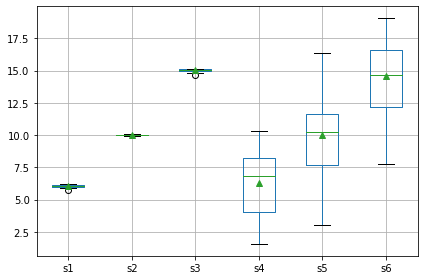

In [27]:
new_df.boxplot(showmeans = True)
plt.tight_layout()

In [28]:
## plot the data using boxplots - also mark the means


In [29]:
## lets print the means of the samples

print('Means of the samples are: ', sample1.mean(), 
      sample2.mean(),
      sample3.mean(), '\n',
      sample4.mean(),
      sample5.mean(),
      sample6.mean())

Means of the samples are:  6.034971742370893 10.010613259387902 15.022655136965927 
 6.320285698875289 10.048951648870752 14.558929470415318


Note that here even though the variations of $\{s_1, s_2, s_3\}$ equals to the variations of the means in $\{s_4, s_5, s_6\}$ we can see this as a stronger evidence to argue that the population means are different in the first group.

__Summary__ ANOVA: comparison of the variance among the means of the populations to the variance among sample observations within the individual populations.

### Notation

- $t$: total number of populations

- $n_{i}$ number of observations within the sample $i$ drawn from the population $i$.

- $y_{ij}$: the measurement for the $j$th observation from the $i$th sample.

- $\mu_{i}$ is the mean for the $i$th population.

__observations__

$n = \sum\limits_{i} n_{i}$ is the total number of observations

### Hypotheses

-  $H_{0}: \mu_{1} = \mu_{2} = \cdots = \mu_{t}$ 

- $H_{a}$: at least one of the equality is not satisfied

## Experiment with F-statistics

__step1__

- Choose a sample of 20 from a normal distribution with $\mu=20$ and $\sigma=2$ and repeat this process 1000 times record variance each time

- Repeat the same process but this time with $\mu = 20$, $\sigma = 2$

In [30]:
var = np.random.normal(loc=20, scale=2, size=20)

In [33]:
np.var(var)

3.990960787820106

In [57]:
sampling_variance = []
for i in range(1000):
    x1 = np.random.normal(20, 2, 20)
    sampling_variance.append(x1.var(ddof =1))

In [58]:
sampling_variance

[3.778965613066859,
 3.786403259512618,
 5.739603805118276,
 2.9291559923818986,
 5.149100052695324,
 5.39568470697412,
 3.526536710126412,
 1.034635079510929,
 6.026210871311313,
 4.299756489250417,
 5.917304606461086,
 3.1465124781369918,
 3.877703207089227,
 4.22120611275096,
 2.790230381526976,
 5.105971684943852,
 2.166837214617706,
 5.279321126751165,
 2.492609287331571,
 3.824460248604235,
 4.685098901109869,
 5.494938396326262,
 4.377695968703915,
 2.7746694836338692,
 3.5037914049627696,
 3.3750535069333965,
 3.7950342975150786,
 2.793144145765329,
 3.3198746080132735,
 2.743759058197972,
 2.8861468023473753,
 2.5135947753442225,
 4.2041572749503064,
 2.721470763989046,
 3.2856972276063448,
 4.063220533451504,
 3.282222326992365,
 7.396413232373876,
 3.248501168255616,
 3.335582585320251,
 3.7430413656532977,
 4.868933930610487,
 1.623359441323452,
 3.493799061458872,
 3.5793351239964566,
 5.650881961192822,
 1.7438979059121418,
 4.893104366425061,
 4.68910520074285,
 3.367245

In [59]:
sampling_variance2 = []
for i in range(1000):
    x1 = np.random.normal(10, 2, 20)
    sampling_variance2.append(x1.var(ddof =1))

In [60]:
sampling_variance2

[3.8080284546963186,
 7.410900452841769,
 6.740554095981435,
 1.9714778095153578,
 2.246047671733524,
 4.260173576081634,
 2.2975655596121065,
 4.974213724456999,
 5.04057227897371,
 6.479346145116185,
 5.590410913620695,
 2.062059277810047,
 2.3051643900307264,
 2.3463547345549878,
 4.64113954776891,
 4.881033976240991,
 3.4163837163356514,
 6.471442656526764,
 5.37940167762125,
 5.824687110339679,
 4.357719994159987,
 3.799854371788469,
 3.8626529469994555,
 5.015668309790698,
 5.599661953904471,
 5.094792616230798,
 5.929567001945839,
 4.959064395802615,
 6.334886225364764,
 5.038468690737854,
 3.7531442002352198,
 2.287533322831658,
 5.514691890741337,
 3.5122542443393727,
 2.041978981620764,
 3.6200726450409184,
 4.007646449540392,
 5.504031331562324,
 2.8266991480590686,
 3.227986671817309,
 5.092920872225841,
 5.238596318691928,
 2.8636457878650647,
 2.1077604934210195,
 3.9489475199489763,
 1.69319257807843,
 6.822090569015408,
 1.5848611273246052,
 5.760986284329445,
 2.926751

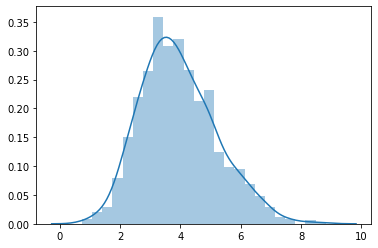

In [65]:
import seaborn as sns
sns.distplot(sampling_variance, kde = True)

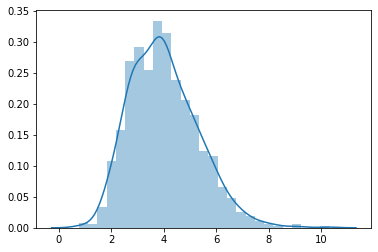

In [66]:
sns.distplot(sampling_variance2, kde = True)

__step2__

Look at the ratio of the variances and plot it.

In [63]:
f_scores = np.array(sampling_variance) / np.array(sampling_variance2)
f_scores

array([0.99236801, 0.51092351, 0.85150326, 1.48576666, 2.29251592,
       1.26654105, 1.53490145, 0.20799972, 1.19554101, 0.66360963,
       1.058474  , 1.52590787, 1.68218077, 1.79904856, 0.60119511,
       1.04608403, 0.63424878, 0.81578736, 0.46336181, 0.65659497,
       1.07512619, 1.44609184, 1.13333919, 0.55320035, 0.62571481,
       0.6624516 , 0.64001879, 0.56324014, 0.52406223, 0.54456209,
       0.76899438, 1.09882324, 0.76235579, 0.77485016, 1.60907495,
       1.12241409, 0.81898999, 1.34381743, 1.1492207 , 1.03333221,
       0.73494984, 0.92943484, 0.56688556, 1.65758827, 0.9064023 ,
       3.33741243, 0.25562515, 3.0874026 , 0.81394139, 1.15050636,
       0.86389254, 1.62954298, 1.35586946, 1.21718759, 1.2332988 ,
       1.45674564, 0.78705622, 1.28755096, 1.44232483, 1.34762173,
       0.38977344, 1.00653733, 1.21731062, 1.23609897, 0.77495592,
       0.90633883, 1.53072962, 0.91526705, 0.70883184, 1.85711296,
       0.54623305, 0.4714296 , 1.24405905, 1.32033542, 3.04518

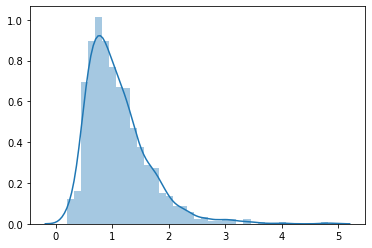

In [64]:
sns.distplot(f_scores, kde=True)

In [67]:
from scipy.stats import f

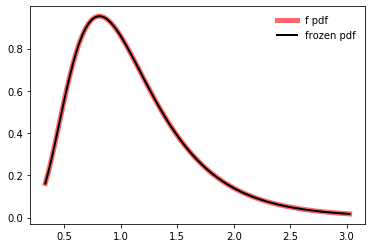

In [68]:
## An example of F statistics

fig, ax = plt.subplots(1, 1)
dfn, dfd = 19,19


x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)

ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

ax.legend(loc='best', frameon=False)

## ANOVA

In [69]:
## let's create a data set first


## sample sizes for different groups
n1 =20
n2=20
n3 =20
n4 = 20

## number of groups
t = 4

In [70]:
x1 = np.random.normal(loc = 950, scale = 100, size = n1)

x2 = np.random.normal(loc = 928, scale = 100, size = n2)

x3 = np.random.normal(loc = 938, scale = 100, size = n3)

x4 = np.random.normal(loc = 1116, scale = 100, size = n4)

df = pd.DataFrame(data = np.stack([x1, x2,x3,x4], axis = 1), columns= ['s1', 's2', 's3', 's4'])

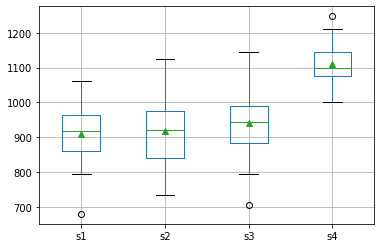

In [71]:
df.boxplot(showmeans = True)

plt.show()

## Hypothesis

$H_{0}$: $\mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$

$H_{a}$: not all means are equal.

In [ ]:
## for the first group

y1_bar = x1.mean()

ss1 = x1.var(ddof =1)

## for the second group

y2_bar = x2.mean()

ss2 = x2.var(ddof = 1)

## for the third group

y3_bar = x3.mean()

ss3 = x3.var(ddof = 1)

## for the last group

y4_bar = x4.mean()

ss4 = x4.var(ddof =1)

In [ ]:
## pooled variance

s_p = sum([ss1, ss2, ss3, ss4])/ (sum([n1, n2, n3, n4]) - 4)

In [ ]:
y = np.sum([x1,x2,x3,x4])

y_bar = y/(n1 + n2 + n3 + n4)

ns_means =(n1 + n2 + n3 + n4)*(np.sum([(y1_bar - y_bar)**2, 
                                       (y2_bar - y_bar)**2,
                                       (y3_bar - y_bar)**2, 
                                       (y4_bar - y_bar)**2 ])) / (t-1)

In [ ]:
f_score = ns_means/s_p
f_score

In [ ]:
dfn = t - 1

dfd = (n1 + n2 + n3 + n4)- t

In [ ]:
1 - f.cdf(f_score, dfn, dfd)